In [1]:
%pip install osmnx matplotlib networkx

Note: you may need to restart the kernel to use updated packages.


Display intersections

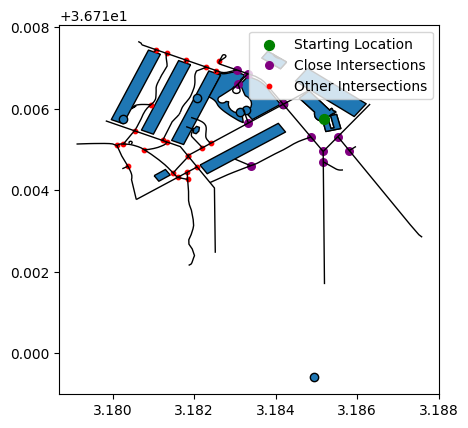

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
import pandas as pd
from math import radians, cos, sin, asin, sqrt

# find real distance  between two points
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6371 * c
    return km

def main():
    # i chose geajson bcz the roads are represented using LineStrings
    geojson_path = 'haaaaaa.geojson'  # Replace with your actual file path
    gdf = gpd.read_file(geojson_path)

    # Check if the GeoDataFrame contains LineStrings (for roads, rivers, etc.)
    if 'LineString' not in gdf['geometry'].geom_type.unique():
        print("The GeoJSON should contain LineString geometries for road network analysis.")
        return

    # Convert LineStrings (each road is represented as a linestring) to a graph we do this to find intersections
    G = nx.Graph()
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            points = list(row['geometry'].coords)
            # we are creating line segments (edges that connect two nodes) at the end we will get -> node (a point) and each edge is the line between two nodes
            for start, end in zip(points[:-1], points[1:]):
                G.add_edge(start, end)

    # get all nodes that have more than two edges
    intersections = [node for node, degree in G.degree if degree > 2]

    target_lat = 36.715756
    target_lon = 3.1851798

    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')
    ax.scatter(target_lon, target_lat, color='green', s=50, marker='o', label='Starting Location')

    int_df = pd.DataFrame(intersections, columns=['Longitude', 'Latitude'])
    int_gdf = gpd.GeoDataFrame(int_df, geometry=gpd.points_from_xy(int_df['Longitude'], int_df['Latitude']))
    
    close_intersections = int_gdf[int_gdf.apply(lambda row: haversine(target_lon, target_lat, row['Longitude'], row['Latitude']) <= 0.25, axis=1)]
    close_intersections.plot(ax=ax, color='purple', markersize=30, marker='o', label='Close Intersections')

    other_intersections = int_gdf[~int_gdf.index.isin(close_intersections.index)]
    other_intersections.plot(ax=ax, color='red', markersize=10, marker='o', label='Other Intersections')

    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Save intersections in csv

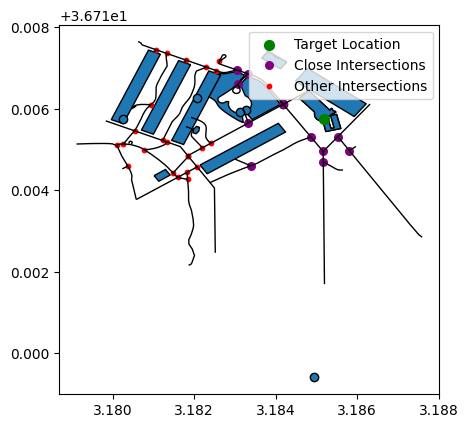

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from string import ascii_uppercas
def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])


    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 

    km = 6371 * c
    return km

def generate_node_names(num_nodes):
    names = []
    for i in range(num_nodes):
        name = ''
        while True:
            name = ascii_uppercase[i % 26] + name
            i //= 26
            if i == 0:
                break
        names.append(name)
    return names

def main():

    geojson_path = 'haaaaaa.geojson' 
    gdf = gpd.read_file(geojson_path)

    if 'LineString' not in gdf['geometry'].geom_type.unique():
        print("The GeoJSON should contain LineString geometries for road network analysis.")
        return

    G = nx.Graph()
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            points = list(row['geometry'].coords)
            for start, end in zip(points[:-1], points[1:]):
                G.add_edge(start, end)


    intersections = [node for node, degree in G.degree if degree > 2]

    node_names = generate_node_names(len(intersections))

    target_lat = 36.715756
    target_lon = 3.1851798

    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')
    
    ax.scatter(target_lon, target_lat, color='green', s=50, marker='o', label='Target Location')

    int_df = pd.DataFrame(intersections, columns=['Longitude', 'Latitude'])
    int_df['Node'] = node_names 
    int_gdf = gpd.GeoDataFrame(int_df, geometry=gpd.points_from_xy(int_df['Longitude'], int_df['Latitude']))
    
    close_intersections = int_gdf[int_gdf.apply(lambda row: haversine(target_lon, target_lat, row['Longitude'], row['Latitude']) <= 0.25, axis=1)]
    close_intersections.plot(ax=ax, color='purple', markersize=30, marker='o', label='Close Intersections')

    other_intersections = int_gdf[~int_gdf.index.isin(close_intersections.index)]
    other_intersections.plot(ax=ax, color='red', markersize=10, marker='o', label='Other Intersections')

    int_df.to_csv('intersections.csv', index=False)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Crossroads pruple and T-junction green

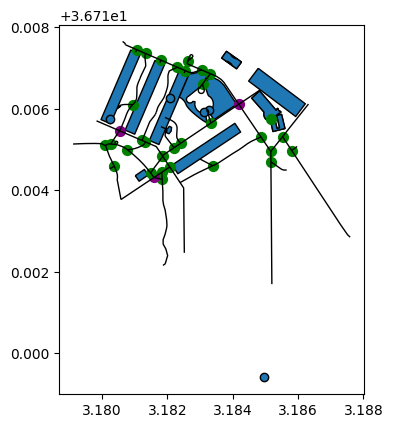

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from string import ascii_uppercase
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6371 * c
    return km

# A,B,C ....,AA,AB etc
def generate_node_names(num_nodes):
    names = []
    for i in range(num_nodes):
        name = ''
        j = i
        while True:
            # convert ndex to letter
            name = ascii_uppercase[j % 26] + name
            j //= 26
            if j == 0:
                break
        names.append(name)
    return names

def main():
    geojson_path = 'haaaaaa.geojson'
    gdf = gpd.read_file(geojson_path)

    if 'LineString' not in gdf['geometry'].geom_type.unique():
        print("The GeoJSON should contain LineString geometries for road network analysis.")
        return

    G = nx.Graph()
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            points = list(row['geometry'].coords)
            for start, end in zip(points[:-1], points[1:]):
                G.add_edge(start, end)

    intersections = [node for node, degree in G.degree if degree > 2]

    node_names = generate_node_names(len(intersections))

    int_df = pd.DataFrame(intersections, columns=['Longitude', 'Latitude'])
    int_df['Node'] = node_names
    # a ce niveau on aura un csv contenant 3 colonnes Longtitude, Latitude and Node

    target_lat = 36.715756
    target_lon = 3.1851798

    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')

    ax.scatter(target_lon, target_lat, color='green', s=50, marker='o')

    for node, degree in G.degree:
        if degree == 3:  
            ax.scatter(node[0], node[1], color='green', s=50, marker='o')
        elif degree == 4:
            ax.scatter(node[0], node[1], color='purple', s=50, marker='o')

    int_gdf = gpd.GeoDataFrame(int_df, geometry=gpd.points_from_xy(int_df['Longitude'], int_df['Latitude']))
    
    int_df.to_csv('intersections.csv', index=False)

    plt.show()

if __name__ == "__main__":
    main()


Test T and Y junctions

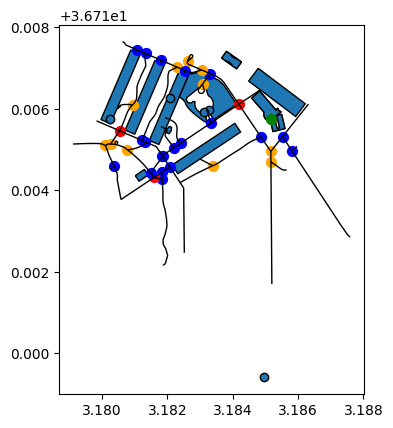

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
import pandas as pd
from math import radians, cos, sin, asin, sqrt, degrees, acos
from string import ascii_uppercase
import numpy as np
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km
def generate_node_names(num_nodes):
    names = []
    for i in range(num_nodes):
        name = ''
        j = i
        while True:
            name = ascii_uppercase[j % 26] + name
            j //= 26
            if j == 0:
                break
        names.append(name)
    return names
def calculate_angle(vec1, vec2):
    unit_vec1 = vec1 / np.linalg.norm(vec1)
    unit_vec2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit_vec1, unit_vec2)
    angle = degrees(acos(dot_product))
    return angle

def main():
    geojson_path = 'haaaaaa.geojson'
    gdf = gpd.read_file(geojson_path)

    if 'LineString' not in gdf['geometry'].geom_type.unique():
        print("The GeoJSON should contain LineString geometries for road network analysis.")
        return

    G = nx.Graph()
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            points = list(row['geometry'].coords)
            for start, end in zip(points[:-1], points[1:]):
                G.add_edge(start, end)

    intersections = [node for node, degree in G.degree if degree > 2]

    node_names = generate_node_names(len(intersections))

    int_df = pd.DataFrame(intersections, columns=['Longitude', 'Latitude'])
    int_df['Node'] = node_names

    road_types = []
    for node in intersections:
        neighbors = list(G.neighbors(node))
        vectors = []
        for neighbor in neighbors:
            vector = np.array([neighbor[0] - node[0], neighbor[1] - node[1]])
            vectors.append(vector)
        angles = []
        for i in range(len(vectors)):
            for j in range(i + 1, len(vectors)):
                angle = calculate_angle(vectors[i], vectors[j])
                angles.append(angle)

        if len(neighbors) == 4:
            road_types.append('Crossroad')
        elif len(neighbors) == 3:
            right_angle_count = sum(1 for angle in angles if abs(angle - 90) < 25)
            if right_angle_count >= 2:
                road_types.append('T-junction')
            else:
                road_types.append('Y-junction')
        else:
            road_types.append('Other')

    int_df['Road Type'] = road_types

    target_lat = 36.715756
    target_lon = 3.1851798

    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')

    ax.scatter(target_lon, target_lat, color='green', s=50, marker='o')

    for node, road_type in zip(intersections, road_types):
        if road_type == 'T-junction':
            ax.scatter(node[0], node[1], color='blue', s=50, marker='o', label='T-junction')
        elif road_type == 'Y-junction':
            ax.scatter(node[0], node[1], color='orange', s=50, marker='o', label='Y-junction')
        elif road_type == 'Crossroad':
            ax.scatter(node[0], node[1], color='red', s=50, marker='o', label='Crossroad')

    int_gdf = gpd.GeoDataFrame(int_df, geometry=gpd.points_from_xy(int_df['Longitude'], int_df['Latitude']))
    
    int_df.to_csv('intersections.csv', index=False)

    plt.show()

if __name__ == "__main__":
    main()


Save all adjacent nodes in the csv

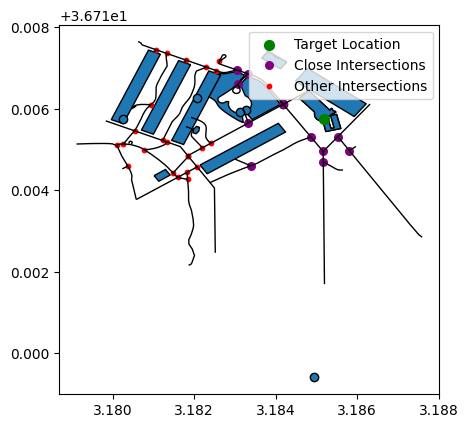

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from string import ascii_uppercase

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6371 * c
    return km
def generate_node_names(num_nodes):
    names = []
    for i in range(num_nodes):
        name = ''
        j = i
        while True:
            name = ascii_uppercase[j % 26] + name
            j //= 26
            if j == 0:
                break
        names.append(name)
    return names

# to a given node
def find_connected_roads(node, gdf):
    connected_roads = []
    # check if the given node is part of any road segment ->  road is  tuple
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            if node in list(row['geometry'].coords):
                connected_roads.append(row['geometry'])
    return connected_roads

def find_closest_intersections(node, connected_roads, intersections, coord_to_node):
    # this to keep the closest intersection bcz we can go to a node from different paths
    closest_intersections = set()
    for road in connected_roads:
        points = list(road.coords)
        if node in points:
            # Finds the index of the node within the road's list of points.
            node_index = points.index(node)
            # iterates backwards from the node's position to the start of the road
            for i in range(node_index - 1, -1, -1):
                # if the current point is an intersection
                if points[i] in intersections:
                    closest_intersections.add(coord_to_node[tuple(points[i])])
                    break
            # now we move forward
            for i in range(node_index + 1, len(points)):
                if points[i] in intersections:
                    closest_intersections.add(coord_to_node[tuple(points[i])])
                    break
    return list(closest_intersections)

def main():
    geojson_path = 'haaaaaa.geojson'
    gdf = gpd.read_file(geojson_path)

    if 'LineString' not in gdf['geometry'].geom_type.unique():
        print("The GeoJSON should contain LineString geometries for road network analysis.")
        return

    G = nx.Graph()
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            points = list(row['geometry'].coords)
            for start, end in zip(points[:-1], points[1:]):
                G.add_edge(start, end)

    intersections = [node for node, degree in G.degree if degree > 2]

    node_names = generate_node_names(len(intersections))

    int_df = pd.DataFrame(intersections, columns=['Longitude', 'Latitude'])
    int_df['Node'] = node_names

    #get the node's name using long and lat
    coord_to_node = {tuple(row[['Longitude', 'Latitude']]): row['Node'] for idx, row in int_df.iterrows()}

    def find_adjacent_nodes(node):
        adjacent_nodes = set()
        connected_roads = find_connected_roads(node, gdf)
        closest_intersections = find_closest_intersections(node, connected_roads, intersections, coord_to_node)
        for intersection in closest_intersections:
            adjacent_nodes.add(intersection)
        return list(adjacent_nodes)

    int_df['Adjacent Nodes'] = int_df.apply(lambda row: find_adjacent_nodes((row['Longitude'], row['Latitude'])), axis=1)

    intersections_df = pd.read_csv('intersections.csv')

    for idx, row in intersections_df.iterrows():
        lon, lat = row['Longitude'], row['Latitude']
        adjacent_nodes = find_adjacent_nodes((lon, lat))
        intersections_df.at[idx, 'Adjacent Nodes'] = str(adjacent_nodes)

    intersections_df.to_csv('intersections.csv', index=False)

    target_lat = 36.715756
    target_lon = 3.1851798

    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')
    
    ax.scatter(target_lon, target_lat, color='green', s=50, marker='o', label='Target Location')

    int_gdf = gpd.GeoDataFrame(int_df, geometry=gpd.points_from_xy(int_df['Longitude'], int_df['Latitude']))
    
    close_intersections = int_gdf[int_gdf.apply(lambda row: haversine(target_lon, target_lat, row['Longitude'], row['Latitude']) <= 0.25, axis=1)]
    close_intersections.plot(ax=ax, color='purple', markersize=30, marker='o', label='Close Intersections')

    other_intersections = int_gdf[~int_gdf.index.isin(close_intersections.index)]
    other_intersections.plot(ax=ax, color='red', markersize=10, marker='o', label='Other Intersections')

    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Display node and its neighbors

Test Node: (3.1851695, 36.7147039)
Adjacent Nodes: ['W']


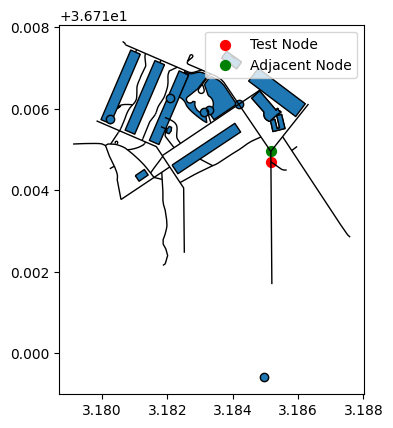

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from string import ascii_uppercase

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])


    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 

    km = 6371 * c
    return km

def generate_node_names(num_nodes):
    names = []
    for i in range(num_nodes):
        name = ''
        j = i
        while True:
            name = ascii_uppercase[j % 26] + name
            j //= 26
            if j == 0:
                break
        names.append(name)
    return names

def find_connected_roads(node, gdf):
    connected_roads = []
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            if node in list(row['geometry'].coords):
                connected_roads.append(row['geometry'])
    return connected_roads

def find_closest_intersections(node, connected_roads, intersections, coord_to_node):
    closest_intersections = set()
    for road in connected_roads:
        points = list(road.coords)
        if node in points:
            node_index = points.index(node)
        
            for i in range(node_index - 1, -1, -1):
                if points[i] in intersections:
                    closest_intersections.add(coord_to_node[tuple(points[i])])
                    break
        
            for i in range(node_index + 1, len(points)):
                if points[i] in intersections:
                    closest_intersections.add(coord_to_node[tuple(points[i])])
                    break
    return list(closest_intersections)

def main():

    geojson_path = 'haaaaaa.geojson' 
    gdf = gpd.read_file(geojson_path)


    if 'LineString' not in gdf['geometry'].geom_type.unique():
        print("The GeoJSON should contain LineString geometries for road network analysis.")
        return


    G = nx.Graph()
    for _, row in gdf.iterrows():
        if isinstance(row['geometry'], LineString):
            points = list(row['geometry'].coords)
            for start, end in zip(points[:-1], points[1:]):
                G.add_edge(start, end)


    intersections = [node for node, degree in G.degree if degree > 2]


    node_names = generate_node_names(len(intersections))


    int_df = pd.DataFrame(intersections, columns=['Longitude', 'Latitude'])
    int_df['Node'] = node_names 


    coord_to_node = {tuple(row[['Longitude', 'Latitude']]): row['Node'] for idx, row in int_df.iterrows()}
    node_to_coord = {v: k for k, v in coord_to_node.items()}


    def find_adjacent_nodes(node):
        adjacent_nodes = set()
        connected_roads = find_connected_roads(node, gdf) 
        closest_intersections = find_closest_intersections(node, connected_roads, intersections, coord_to_node) 
        for intersection in closest_intersections:
            adjacent_nodes.add(intersection)
        return list(adjacent_nodes)


    int_df['Adjacent Nodes'] = int_df.apply(lambda row: find_adjacent_nodes((row['Longitude'], row['Latitude'])), axis=1)


    intersections_df = pd.read_csv('intersections.csv')


    for idx, row in intersections_df.iterrows():
        lon, lat = row['Longitude'], row['Latitude']
        adjacent_nodes = find_adjacent_nodes((lon, lat))
        intersections_df.at[idx, 'Adjacent Nodes'] = str(adjacent_nodes)


    intersections_df.to_csv('intersections.csv', index=False)


    test_node_lon = 3.1851695
    test_node_lat = 36.7147039
    test_node = (test_node_lon, test_node_lat)
    adjacent_nodes = find_adjacent_nodes(test_node)
    print(f"Test Node: {test_node}")
    print(f"Adjacent Nodes: {adjacent_nodes}")


    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')
    

    ax.scatter(test_node_lon, test_node_lat, color='red', s=50, marker='o', label='Test Node')
    

    for adj_node_name in adjacent_nodes:
        adj_node_coords = node_to_coord[adj_node_name]
        ax.scatter(adj_node_coords[0], adj_node_coords[1], color='green', s=50, marker='o', label='Adjacent Node')

    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Coordinates with closest intersections

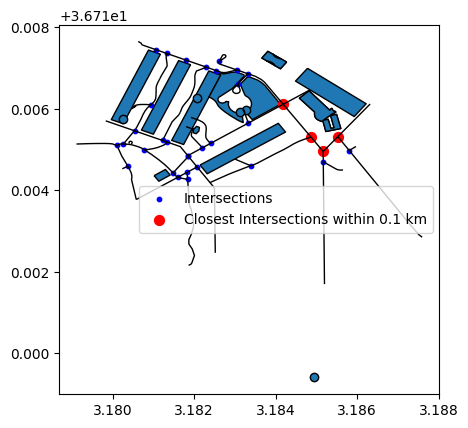

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt


def haversine(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    km = 6371 * c
    return km

def find_closest_intersections_within_radius(input_lon, input_lat, csv_path='intersections.csv', radius_km=0.1):
    
    intersections_df = pd.read_csv(csv_path)
    intersections_df['Distance'] = intersections_df.apply(
        lambda row: haversine(input_lon, input_lat, row['Longitude'], row['Latitude']),
        axis=1
    )
    closest_intersections = intersections_df[intersections_df['Distance'] <= radius_km]
    return closest_intersections

def main():
    
    input_lon = 3.1851798
    input_lat = 36.71575
    
    
    closest_intersections = find_closest_intersections_within_radius(input_lon, input_lat, radius_km=0.1)
    
    if closest_intersections.empty:
        print("No intersections found within the specified radius.")
        return
    
    geojson_path = 'haaaaaa.geojson'  
    gdf = gpd.read_file(geojson_path)
    
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')
    
    intersections_df = pd.read_csv('intersections.csv')
    gdf_intersections = gpd.GeoDataFrame(
        intersections_df, geometry=gpd.points_from_xy(intersections_df['Longitude'], intersections_df['Latitude'])
    )
    gdf_intersections.plot(ax=ax, color='blue', markersize=10, marker='o', label='Intersections')
    
    gdf_closest = gpd.GeoDataFrame(
        closest_intersections, geometry=gpd.points_from_xy(closest_intersections['Longitude'], closest_intersections['Latitude'])
    )
    gdf_closest.plot(ax=ax, color='red', markersize=50, marker='o', label='Closest Intersections within 0.1 km')
    
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Find path

Starting path search from node W
Nodes that create the path: ['W', 'M', 'E', 'X', 'BA']
Adjacent nodes to the starting node W: ['M', 'D', 'V']
Next node in path after starting node: M
Adjacent nodes to starting node except the next node M: ['D', 'V']
Closest adjacent node to the next node M: D
Angle between starting node W, closest node D, and next node M: 135.38275975556755 degrees
The closest node D is on the right of the line segment W-M
The turn direction right matches the required turn direction in the list. M is probably the next node.
Processing node M with adjacent nodes: ['N', 'E', 'W']
Next node in path: E
Node we came from: W
Adjacent nodes to M except next node E and node we came from W: ['N']
Closest adjacent node to the next node E: N
Angle between current node M, closest node N, and next node E: 216.55367129323258 degrees
The closest node N is on the left of the line segment M-E
The turn direction left matches the required turn direction in the list. E is probably the ne

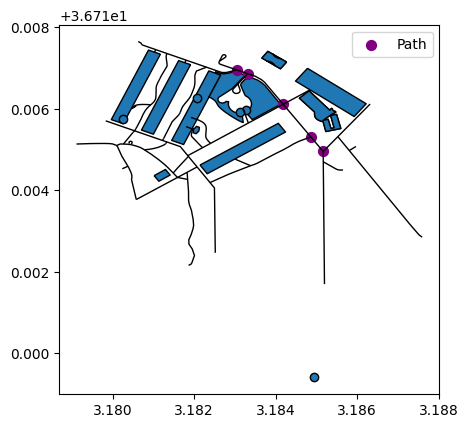

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt, degrees, atan2
import ast

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km

def find_closest_intersections_within_radius(input_lon, input_lat, csv_path='intersections.csv', radius_km=0.1):
    intersections_df = pd.read_csv(csv_path)
    intersections_df['Distance'] = intersections_df.apply(
        lambda row: haversine(input_lon, input_lat, row['Longitude'], row['Latitude']),
        axis=1
    )
    closest_intersections = intersections_df[intersections_df['Distance'] <= radius_km]
    return closest_intersections

def find_adjacent_nodes(node, intersections_df):
    adjacent_nodes_str = intersections_df[intersections_df['Node'] == node]['Adjacent Nodes'].values[0]
    adjacent_nodes = ast.literal_eval(adjacent_nodes_str)
    return adjacent_nodes

def calculate_angle(point1, point2, point3):
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3
    
    dx1 = x2 - x1
    dy1 = y2 - y1
    dx2 = x3 - x2
    dy2 = y3 - y2
    
    angle = degrees(atan2(dy2, dx2) - atan2(dy1, dx1))
    if angle < 0:
        angle += 360
    return angle

def find_path(current_node, road_type_sequence, intersections_df, visited_nodes):
    # soit liste vide soit kemelna path 
    if not road_type_sequence:
        return [current_node]

    adjacent_nodes = find_adjacent_nodes(current_node, intersections_df)
    for adj_node in adjacent_nodes:
        if adj_node in visited_nodes:
            continue
        if intersections_df[intersections_df['Node'] == adj_node]['Road Type'].values[0] == road_type_sequence[0]:
            # recursive 
            result_path = find_path(adj_node, road_type_sequence[1:], intersections_df, visited_nodes + [current_node])
            if result_path:
                return [current_node] + result_path

    return None

def enhanced_find_path(current_node, road_type_sequence, intersections_df, visited_nodes, turn_directions):
    stack = [(current_node, road_type_sequence, turn_directions[:], visited_nodes[:])]
    
    while stack:
        current_node, remaining_road_types, remaining_turn_directions, visited_nodes = stack.pop()
        
        if not remaining_road_types:
            return visited_nodes + [current_node]

        adjacent_nodes = find_adjacent_nodes(current_node, intersections_df)
        for adj_node in adjacent_nodes:
            if adj_node in visited_nodes:
                continue
            if intersections_df[intersections_df['Node'] == adj_node]['Road Type'].values[0] == remaining_road_types[0]:
                # instead of going deep we use the find_path function
                new_path = find_path(adj_node, remaining_road_types[1:], intersections_df, visited_nodes + [current_node])
                if new_path:
                    # stack rrsults if we get a path for further exploration
                    stack.append((adj_node, remaining_road_types[1:], remaining_turn_directions[:], visited_nodes + [current_node]))
                    
    return None

def main():
    input_lon = 3.1851798
    input_lat = 36.71575
    road_type_sequence = ['Y-junction', 'T-junction', 'Crossroad', 'T-junction', 'Y-junction']
    turn_directions = ['right', 'left', 'left'] 

    closest_intersections = find_closest_intersections_within_radius(input_lon, input_lat, radius_km=0.1)
    if closest_intersections.empty:
        print("No intersections found within the specified radius.")
        return

    intersections_df = pd.read_csv('intersections.csv')

    # what is the first node that we chose among the closest nodes for a specific coordinates ?
    for _, row in closest_intersections.iterrows():
        if row['Road Type'] == road_type_sequence[0]:
            print(f"Starting path search from node {row['Node']}")
            path = enhanced_find_path(row['Node'], road_type_sequence[1:], intersections_df, [], turn_directions)
            if path:
                break
    else:
        print("No valid path found for the given road type sequence.")
        return

    print("Nodes that create the path:", path)
    
    starting_node = path[0]
    adjacent_nodes = find_adjacent_nodes(starting_node, intersections_df)
    print(f"Adjacent nodes to the starting node {starting_node}: {adjacent_nodes}")
    
    if len(adjacent_nodes) > 2 and intersections_df[intersections_df['Node'] == starting_node]['Road Type'].values[0] != 'Crossroad':
        next_node = path[1]
        print(f"Next node in path after starting node: {next_node}")
        
        adjacent_nodes_to_check = [node for node in adjacent_nodes if node != next_node]
        print(f"Adjacent nodes to starting node except the next node {next_node}: {adjacent_nodes_to_check}")
        
        
        next_point = intersections_df[intersections_df['Node'] == next_node][['Longitude', 'Latitude']].values[0]
        current_point = intersections_df[intersections_df['Node'] == starting_node][['Longitude', 'Latitude']].values[0]
        
        min_distance = float('inf')
        closest_node = None
        closest_angle = None
        for node in adjacent_nodes_to_check:
            adj_point = intersections_df[intersections_df['Node'] == node][['Longitude', 'Latitude']].values[0]
            distance = haversine(next_point[0], next_point[1], adj_point[0], adj_point[1])
            if distance < min_distance:
                min_distance = distance
                closest_node = node
                closest_angle = calculate_angle(current_point, adj_point, next_point)
        
        print(f"Closest adjacent node to the next node {next_node}: {closest_node}")
        print(f"Angle between starting node {starting_node}, closest node {closest_node}, and next node {next_node}: {closest_angle} degrees")
        
        turn_direction_index = 0  
        if closest_angle < 180:
            turn_direction = 'right'
            print(f"The closest node {closest_node} is on the right of the line segment {starting_node}-{next_node}")
        else:
            turn_direction = 'left'
            print(f"The closest node {closest_node} is on the left of the line segment {starting_node}-{next_node}")
        
        if turn_directions[turn_direction_index] == turn_direction:
            print(f"The turn direction {turn_direction} matches the required turn direction in the list. {next_node} is probably the next node.")
        else:
            print(f"The turn direction {turn_direction} does not match the required turn direction in the list. {next_node} is not the next node and we need to find another adjacent node.")
            
            for node in adjacent_nodes_to_check:
                if node != next_node and intersections_df[intersections_df['Node'] == node]['Road Type'].values[0] == road_type_sequence[1]:
                    next_node = node
                    print(f"New selected next node: {next_node}")
                    path[1] = next_node
                    print("Updated path:", path)

                    # Recalculate the path from the new 'next_node'
                    new_start_index = path.index(next_node)
                    new_road_type_sequence = road_type_sequence[new_start_index:]  
                    remaining_path = find_path(next_node, new_road_type_sequence, intersections_df, path[:new_start_index + 1])
                    if remaining_path:
                        # Reconstruct the full path with the new segment
                        path = path[:new_start_index + 1] + remaining_path  
                        print("Revised path after adjustment:", path)
                    else:
                        print("No valid continuation found from the new next node.")
                    break


   
    turn_direction_index = 1  
    for i in range(1, len(path) - 1):
        current_node = path[i]
        previous_node = path[i - 1]
        next_node = path[i + 1]
        adjacent_nodes = find_adjacent_nodes(current_node, intersections_df)
        
        print(f"Processing node {current_node} with adjacent nodes: {adjacent_nodes}")
        
        if len(adjacent_nodes) > 2 and intersections_df[intersections_df['Node'] == current_node]['Road Type'].values[0] != 'Crossroad':
            print(f"Next node in path: {next_node}")
            print(f"Node we came from: {previous_node}")
            
            adjacent_nodes_to_check = [node for node in adjacent_nodes if node != next_node and node != previous_node]
            print(f"Adjacent nodes to {current_node} except next node {next_node} and node we came from {previous_node}: {adjacent_nodes_to_check}")
            
            # on recupere les coordonnees
            next_point = intersections_df[intersections_df['Node'] == next_node][['Longitude', 'Latitude']].values[0]
            current_point = intersections_df[intersections_df['Node'] == current_node][['Longitude', 'Latitude']].values[0]
            
            min_distance = float('inf')
            closest_node = None
            closest_angle = None
            for node in adjacent_nodes_to_check:
                adj_point = intersections_df[intersections_df['Node'] == node][['Longitude', 'Latitude']].values[0]
                distance = haversine(next_point[0], next_point[1], adj_point[0], adj_point[1])
                if distance < min_distance:
                    min_distance = distance
                    closest_node = node
                    closest_angle = calculate_angle(current_point, adj_point, next_point)
            
            print(f"Closest adjacent node to the next node {next_node}: {closest_node}")
            print(f"Angle between current node {current_node}, closest node {closest_node}, and next node {next_node}: {closest_angle} degrees")
            
            if closest_angle < 180:
                turn_direction = 'right'
                print(f"The closest node {closest_node} is on the right of the line segment {current_node}-{next_node}")
            else:
                turn_direction = 'left'
                print(f"The closest node {closest_node} is on the left of the line segment {current_node}-{next_node}")
            
            if turn_directions[turn_direction_index] == turn_direction:
                print(f"The turn direction {turn_direction} matches the required turn direction in the list. {next_node} is probably the next node.")
            else:
                print(f"The turn direction {turn_direction} does not match the required turn direction in the list. {next_node} is not the next node and we need to find another adjacent node.")
            
                for node in adjacent_nodes_to_check:
                    if node != previous_node and node != next_node:
                        next_node = node
                        print(f"New selected next node: {next_node}")
                        path[i + 1] = next_node
                        print("Updated path:", path)
                        if i + 1 == len(path) - 1:
                            print("End")
                        else:
                            new_road_type_sequence = road_type_sequence[i + 1:]
                            new_turn_directions = turn_directions[i:]
                            path = path[:i + 1] + enhanced_find_path(next_node, new_road_type_sequence, intersections_df, path[:i + 1], new_turn_directions)
                            print("Rebuilt path:", path)
                        break

            turn_direction_index += 1  

    geojson_path = 'haaaaaa.geojson'  
    gdf = gpd.read_file(geojson_path)
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, linewidth=1, edgecolor='black')
    
    gdf_intersections = gpd.GeoDataFrame(
        intersections_df, geometry=gpd.points_from_xy(intersections_df['Longitude'], intersections_df['Latitude'])
    )
    #gdf_intersections.plot(ax=ax, color='blue', markersize=10, marker='o', label='Intersections')
    
    
    path_df = intersections_df[intersections_df['Node'].isin(path)]
    gdf_path = gpd.GeoDataFrame(
        path_df, geometry=gpd.points_from_xy(path_df['Longitude'], path_df['Latitude'])
    )
    gdf_path.plot(ax=ax, color='purple', markersize=50, marker='o', label='Path')
    

    node_u = intersections_df[intersections_df['Node'] == 'U']
    gdf_node_u = gpd.GeoDataFrame(
        node_u, geometry=gpd.points_from_xy(node_u['Longitude'], node_u['Latitude'])
    )
    #gdf_node_u.plot(ax=ax, color='red', markersize=100, marker='o', label='Node U')
    
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
